In [6]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [7]:
df = pd.read_csv('csv_files/ADV.csv',index_col='industry_code')

In [8]:
#This version includes the debit ratio and the percent of cash transactions. The debit_percent feature is influential; removing it will change the number of clusters

In [9]:
df.head()

,customer_id,industry,industry_group,employee_count,sales,abm_num_debit,abm_avg_debit,abm_num_credit,abm_avg_credit,card_num_debit,...,eft_num_debit,eft_avg_debit,eft_num_credit,eft_avg_credit,emt_num_debit,emt_avg_debit,emt_num_credit,emt_avg_credit,cash_percent,debit_percent
industry_code,,,,,,,,,,,,,,,,,,,,,
7292,SYNCID0000000000,"Estate, Trust and Agency Funds",Investment Companies,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,99.999554
NaN,SYNCID0000000001,NaN,NaN,NaN,66446.0,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,100.000000
7721,SYNCID0000000002,Computer Services,Management Consulting,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,52.164736
4565,SYNCID0000000004,Forest Products Trucking Industry,Trucking and Freight,1.0,328160.0,NaN,NaN,NaN,NaN,41.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,44.092805
7799,SYNCID0000000005,Other Business Services n.e.c.,Management Consulting,1.0,0.0,NaN,NaN,NaN,NaN,NaN,...,15.0,8363.572667,35.0,1137.053714,NaN,NaN,NaN,NaN,0.0,75.917236


In [10]:
df.fillna({'industry_code': 'Unknown'}, inplace=True)
df.fillna({'industry': 'Unknown'}, inplace=True) #could improve this bu putting other and null in different groups
df.fillna({'industry_group': 'Unknown'}, inplace=True) 

In [11]:
df['employee_count'] = df.groupby('industry_group')['employee_count'].transform(lambda x: x.fillna(x.mean()))
df['sales'] = df.groupby('industry_group')['sales'].transform(lambda x: x.fillna(x.mean()))

In [12]:
df.fillna(0.0, inplace=True)

In [13]:
df.head()

,customer_id,industry,industry_group,employee_count,sales,abm_num_debit,abm_avg_debit,abm_num_credit,abm_avg_credit,card_num_debit,...,eft_num_debit,eft_avg_debit,eft_num_credit,eft_avg_credit,emt_num_debit,emt_avg_debit,emt_num_credit,emt_avg_credit,cash_percent,debit_percent
industry_code,,,,,,,,,,,,,,,,,,,,,
7292,SYNCID0000000000,"Estate, Trust and Agency Funds",Investment Companies,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,99.999554
NaN,SYNCID0000000001,Unknown,Unknown,2.16297,66446.000000,0.0,0.0,0.0,0.0,4.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,100.000000
7721,SYNCID0000000002,Computer Services,Management Consulting,2.00000,193864.737815,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,52.164736
4565,SYNCID0000000004,Forest Products Trucking Industry,Trucking and Freight,1.00000,328160.000000,0.0,0.0,0.0,0.0,41.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,44.092805
7799,SYNCID0000000005,Other Business Services n.e.c.,Management Consulting,1.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,15.0,8363.572667,35.0,1137.053714,0.0,0.0,0.0,0.0,0.0,75.917236


In [14]:
df_numeric = df.select_dtypes(include=['number'])

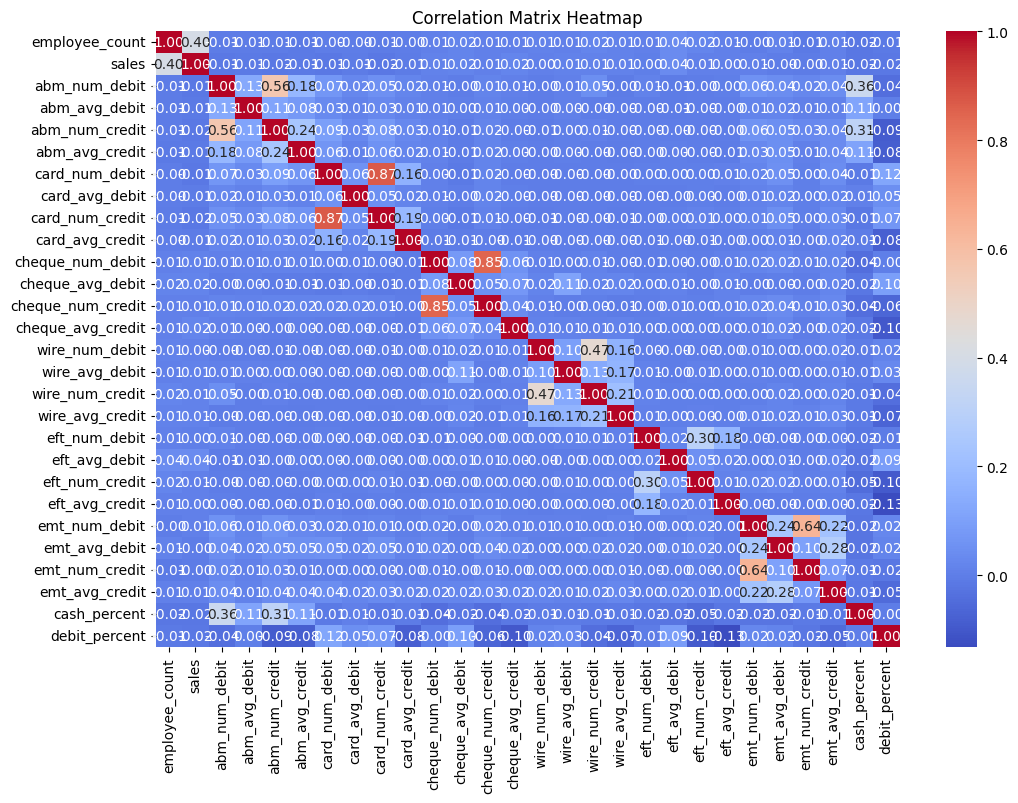

In [15]:
##Correlation matrix
correlation_matrix = df_numeric.corr()

##Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [16]:
df_numeric.drop(columns = ['card_num_credit','cheque_num_credit'],inplace=True)

In [17]:
#Scale the features with minmax scaler
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

In [18]:
# Range of cluster numbers to evaluate
cluster_range = range(2, 11)
for k in cluster_range:
    model = KMeans(n_clusters=k, random_state=10)
    model.fit(data_scaled)  # Fit the model on scaled data
    print('Model '+str(k)+' intertia: {:.2f}'.format(model.inertia_))


Model 2 intertia: 730.79
Model 3 intertia: 507.39
Model 4 intertia: 432.71
Model 5 intertia: 406.84
Model 6 intertia: 382.93
Model 7 intertia: 347.79
Model 8 intertia: 329.76
Model 9 intertia: 321.98
Model 10 intertia: 310.82


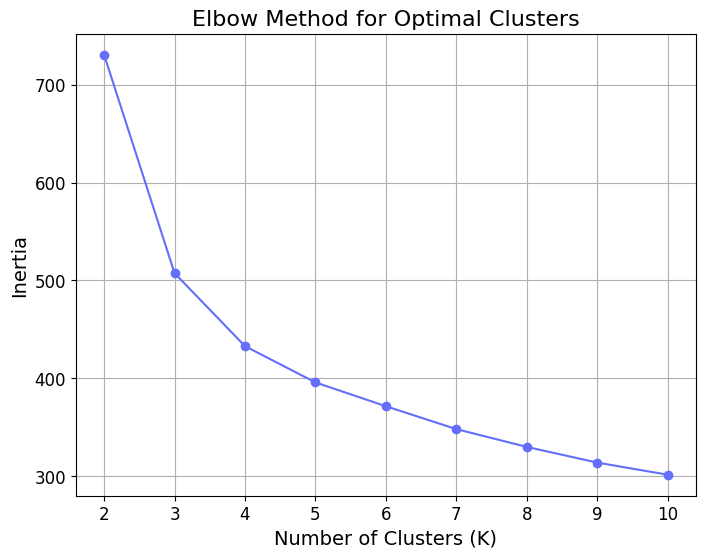

In [19]:
inertia_values = []

for k in cluster_range:
    model = KMeans(n_clusters=k, n_init=10,random_state=1)
    model.fit(data_scaled)
    cluster_numbers = model.fit_predict(data_scaled)
    cluster_labels = [str(c) for c in cluster_numbers]
    centroids = model.cluster_centers_
    
    inertia = model.inertia_
    inertia_values.append(inertia)

# Plotting the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia_values, marker='o',color='#636EFA')
plt.title("Elbow Method for Optimal Clusters", fontsize=16)
plt.xlabel("Number of Clusters (K)",fontsize=14)
plt.ylabel("Inertia",fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
plt.show()

In [20]:
n_clusters = 4
model = KMeans(n_clusters=n_clusters, n_init=10, random_state=4)
cluster_numbers = model.fit_predict(data_scaled)
cluster_labels = [str(c) for c in cluster_numbers]

# Centroids in scaled space
centroids = model.cluster_centers_
centroids
# Transform centroids back to original space
centroids_original_space = scaler.inverse_transform(centroids)
centroids_df = pd.DataFrame(centroids_original_space, columns=data_scaled.columns)

# Add cluster labels back to the original (non-scaled) dataset
df_numeric['Cluster'] = cluster_labels
#data['Cluster'] = cluster_labels
df['Cluster'] = cluster_labels


In [21]:
df.head()

,customer_id,industry,industry_group,employee_count,sales,abm_num_debit,abm_avg_debit,abm_num_credit,abm_avg_credit,card_num_debit,...,eft_avg_debit,eft_num_credit,eft_avg_credit,emt_num_debit,emt_avg_debit,emt_num_credit,emt_avg_credit,cash_percent,debit_percent,Cluster
industry_code,,,,,,,,,,,,,,,,,,,,,
7292,SYNCID0000000000,"Estate, Trust and Agency Funds",Investment Companies,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,99.999554,2
NaN,SYNCID0000000001,Unknown,Unknown,2.16297,66446.000000,0.0,0.0,0.0,0.0,4.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,100.000000,2
7721,SYNCID0000000002,Computer Services,Management Consulting,2.00000,193864.737815,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,52.164736,1
4565,SYNCID0000000004,Forest Products Trucking Industry,Trucking and Freight,1.00000,328160.000000,0.0,0.0,0.0,0.0,41.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,44.092805,1
7799,SYNCID0000000005,Other Business Services n.e.c.,Management Consulting,1.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,8363.572667,35.0,1137.053714,0.0,0.0,0.0,0.0,0.0,75.917236,0


In [22]:
#if i can put the industry into the isolation forest then I don't need it in clustering (?)
X0 = df_numeric[df_numeric['Cluster']=='0'].iloc[:,:-1]
X1 = df_numeric[df_numeric['Cluster']=='1'].iloc[:,:-1]
X2 = df_numeric[df_numeric['Cluster']=='2'].iloc[:,:-1]
X3 = df_numeric[df_numeric['Cluster']=='3'].iloc[:,:-1]

In [23]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(contamination=0.01, random_state=42)

clf.fit(X0)
y_pred = clf.predict(X0)
X0['anomoly']=y_pred

clf.fit(X1)
y_pred = clf.predict(X1)
X1['anomoly']=y_pred

clf.fit(X2)
y_pred = clf.predict(X2)
X2['anomoly']=y_pred

clf.fit(X3)
y_pred = clf.predict(X3)
X3['anomoly']=y_pred


In [24]:
result = pd.concat([X0, X1, X2,X3], ignore_index=False)

In [25]:
anomoly_list = result[result['anomoly']==-1].index

In [26]:
np.savetxt("anomolies_withDebitRatio2.csv", anomoly_list.to_numpy(), fmt='%s', delimiter=",")

In [28]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('anomolies_withDebitRatio2.csv', header=None, names=['industry_code'])

# Drop any rows with missing values (if needed)
df = df.dropna()

# Count the occurrences of each unique industry code
industry_counts = df['industry_code'].value_counts().reset_index()
industry_counts.columns = ['industry_code', 'count']

# Calculate percentage of total
industry_counts['percentage'] = (industry_counts['count'] / industry_counts['count'].sum()) * 100

# Format percentage to 2 decimal places
industry_counts['percentage'] = industry_counts['percentage'].round(2)

# Display the counts
print(industry_counts)

# Save the results to a CSV file
industry_counts.to_csv('industry_code_counts_with_percentage.csv', index=False)


   industry_code  count  percentage
0           7761     23       14.47
1           7771     18       11.32
2          other     16       10.06
3           7759      9        5.66
4           7215      7        4.40
..           ...    ...         ...
61          4261      1        0.63
62          9942      1        0.63
63          7731      1        0.63
64          0141      1        0.63
65          0211      1        0.63

[66 rows x 3 columns]
